## Ubicar regiones de alta densidad con DBSCAN

Este algoritmo recibe el nombre de ***Agrupamiento espacial basado en densidad de aplicaciones con ruido (Density-based Spatial Clustering of Applications with Noise)***, el cual asigna etiquetas a regiones de puntas mas densas, en donde la densidad se determina con el cirterio: *densidad es el numero de puntos dentro de un radio especifico $\epsilon$.*

Segun el algoritmo, se asigna una etiqueta especial a cada muestra (punto) mediante los siguientes criterios:

* Un punto se considera un **punto nucleo** si, como minimo, un numero especifico (MinPts) de puntos alcanzables caen dentro del radio especificado $\epsilon$.
* Un **punto borde** es un punto que tiene menos puntos alcanzables que MinPts dentro de  $\epsilon$, pero se encuentra dentro del radio $\epsilon$ de un punto nucleo.
* Todos los puntos que no son ni nucleo ni borde se consideran **puntos ruidosos**.

Despues de este etiquetado, el algoritmo se resume en dos pasos:
1. Formar un grupo separado para cada punto nucleo o grupo conectado de puntos nucleo (los punto nucleo estan conectados si no estan mas lejos que $\epsilon$).
2. Asignar cada punto borde al grupo de su correspondiente punto nucleo. 

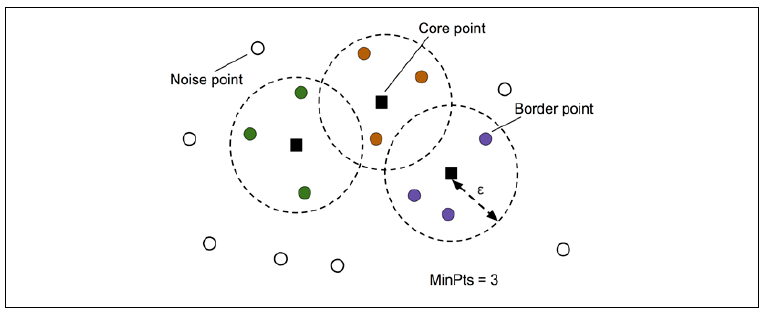

`Animacion:` https://www.youtube.com/watch?v=h53WMIImUuc 

Una de las ventajas de este algoritmo es que no asume una forma esferica para cada grupo, ademas de que no asgina los grupos ruidososo necesariamente a ningun grupo, lo cual permite eliminarlos.

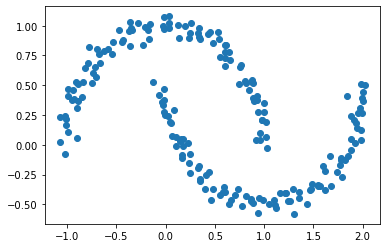

In [1]:
# Conjunto de datos de trabajo artificial 
# ===================================================
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

fig, ax= plt.subplots()
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
ax.scatter(X[:, 0], X[:, 1]);

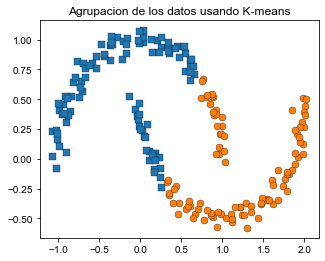

In [2]:
# Agrupacion de los datos usando Kmeans
# ===================================================
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2)
y_km = km.fit_predict(X)

fig, ax = plt.subplots(figsize = (5, 4))
plt.style.use('seaborn')

ax.scatter(X[y_km == 0, 0], X[y_km==0, 1], marker = 's', edgecolor = 'k')
ax.scatter(X[y_km == 1, 0], X[y_km==1, 1], marker = 'o', edgecolor = 'k')
ax.set_title("Agrupacion de los datos usando K-means");

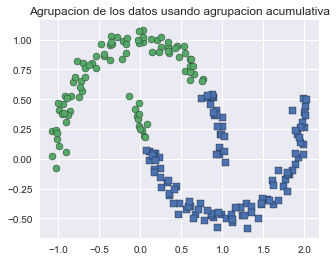

In [3]:
# Agrupacion de los datos usando agrupacion acumulativa 
# ===================================================
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
y_km2 = ac.fit_predict(X)

fig, ax = plt.subplots(figsize = (5, 4))
plt.style.use('seaborn')

ax.scatter(X[y_km2 == 0, 0], X[y_km2==0, 1], marker = 's', edgecolor = 'k')
ax.scatter(X[y_km2 == 1, 0], X[y_km2==1, 1], marker = 'o', edgecolor = 'k')
ax.set_title("Agrupacion de los datos usando agrupacion acumulativa");

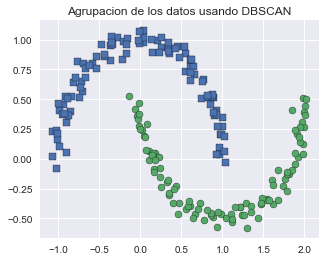

In [4]:
# Agrupacion de los datos usando DBSCAN
# ================================================
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.2, min_samples = 5, metric = 'euclidean')
y_km3 = db.fit_predict(X)

fig, ax = plt.subplots(figsize = (5, 4))
plt.style.use('seaborn')

ax.scatter(X[y_km3 == 0, 0], X[y_km3==0, 1], marker = 's', edgecolor = 'k')
ax.scatter(X[y_km3 == 1, 0], X[y_km3==1, 1], marker = 'o', edgecolor = 'k')
ax.set_title("Agrupacion de los datos usando DBSCAN");

Dentro de las dificultades que puede experimentar el algoritmo, esta la llamada ***maldicion de la dimesionalidad***, la cual consiste en lo siguiente: 

>*Cuando aumenta la dimensionalidad, el volumen del espacio aumenta exponencialmente haciendo que los datos disponibles se vuelven dispersos. Esta dispersión es problemática para cualquier método que requiera significación estadística*. 

Lo anterior, tomado de Wikipedia, se manifiesta sobretodo en el calculo de la distancia, la cual crecera exponencialmente segun aumentemos las dimensiones del problema (columnas de caracteristicas).

Otro problema es la exitencia de dos hiperparametros a optimizar: `eps` y `min_samples`; encontrar un equilibrio entre estos dos puede llegar a ser complicado, mas aun, cuandio las densidades de los grupos son muy distintas.

<div class="burk">
EJERICICIO</div><i class="fa fa-lightbulb-o "></i>

1. Usar el archivo `seeds_dataset.txt`, del cual encontrara mas informacion en la pagina https://archive.ics.uci.edu/ml/datasets/seeds. Cuando use la instruccion de pandas para importar el archivo, agregue el parametro `sep = '\s+'` para importarlo de manera adecuada.
2. Separe los datos en matrices X y y, de las cuales solo nos interesa la matriz X; para esto asuma que la matriz y estara dada por la ultima columna.
3. Escale las caracteristicas, para asegurarse de que la distancia euclidiana sea una metrica adecuada.
4. Utilice analisis de componentes principales para reducir las caracteristicas a 2, y asi poder visualizarlas.
5. Visualice la matriz de dos caracteristicas X, usando la columna 0 para el eje horizontal y la columna 1 para el eje vertical.
6. Utilice el metodo elbow para determinar cuantos grupos serian los mas adecuados para la agrupacion.
7. Realice la agrupacion utilizando KMeans con *k* segun lo hallado en el punto anterior.
8. Agrupe usando KMeans.
9. Grafique sus agrupaciones mostrando los centroides.
10. Realice los mismo de antes, pero usando DBScan. Se dara cuenta que en esta ocasion no es muy adecuado este metodo.

In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv('seeds_dataset.txt', sep = '\s+', header = None)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [9]:
X = df.iloc[:,0:7].values
y = df.iloc[:,7]

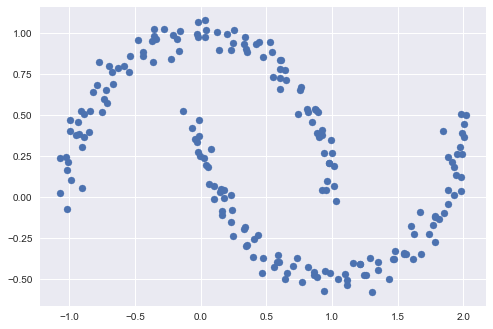

In [10]:
# Conjunto de datos de trabajo artificial 
# ===================================================
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

fig, ax= plt.subplots()
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
ax.scatter(X[:, 0], X[:, 1]);

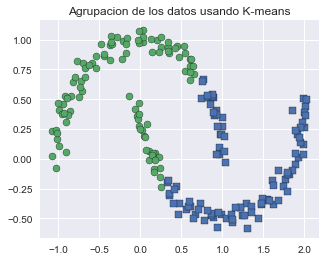

In [11]:
# Agrupacion de los datos usando Kmeans
# ===================================================
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2)
y_km = km.fit_predict(X)

fig, ax = plt.subplots(figsize = (5, 4))
plt.style.use('seaborn')

ax.scatter(X[y_km == 0, 0], X[y_km==0, 1], marker = 's', edgecolor = 'k')
ax.scatter(X[y_km == 1, 0], X[y_km==1, 1], marker = 'o', edgecolor = 'k')
ax.set_title("Agrupacion de los datos usando K-means");

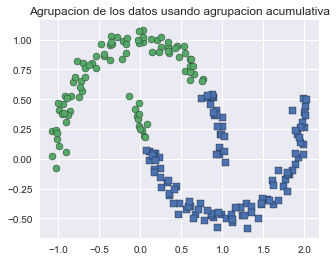

In [12]:
# Agrupacion de los datos usando agrupacion acumulativa 
# ===================================================
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
y_km2 = ac.fit_predict(X)

fig, ax = plt.subplots(figsize = (5, 4))
plt.style.use('seaborn')

ax.scatter(X[y_km2 == 0, 0], X[y_km2==0, 1], marker = 's', edgecolor = 'k')
ax.scatter(X[y_km2 == 1, 0], X[y_km2==1, 1], marker = 'o', edgecolor = 'k')
ax.set_title("Agrupacion de los datos usando agrupacion acumulativa");